<a href="https://colab.research.google.com/github/Karimi-Gichunge/Core_IP_Week4/blob/master/Moringa_Data_Science_Core_W4_Independent_Project_2020_07_Winfred_Karimi_PythonNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis Testing on Bluecar usage on different day types for Autolib Electric Carsharing 

## 1. Defining the Question

### Problem Statement

>To investigate whether there is a viable difference between Bluecar usage on different day types, i.e weekdays or weekends

### Hypothesis



**Key**:

mu₁: mean of bluecars taken during normal weekdays 

mu₂: mean of bluecars taken during the weekends

**Null and Alternative hypothesis**

Ho: mu₁ = mu₂

H1: mu₁ != mu₂


## 2. Reading the Data

In [1]:
#First we will import the necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
# Loading the Data from the source
# ---
data = pd.read_csv('autolib_daily_events.csv')
#Previewing the upper part of the data
data.head(3)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27


In [3]:
#Previewing the lower part of the data
data.tail(3)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


## 3. Checking the Data

In [4]:
# Determining the no. of records in our dataset
#
print('Shape of dataset:')
print(data.shape)
#Getting column names
print('Column names of dataset:')
print(data.columns)

Shape of dataset:
(16085, 13)
Column names of dataset:
Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')


In [5]:
# Checking whether each column has an appropriate datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [6]:
#Checking for unique attributes from data
data.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [7]:
#Check for basic descriptive statistics for the numeric columns
print('Basic Statistics for Blue Cars Returned:')
print(data['BlueCars_returned_sum'].describe())

print('Basic Statistics for Blue Cars Taken:')
data['BlueCars_taken_sum'].describe()


Basic Statistics for Blue Cars Returned:
count    16085.000000
mean       125.912714
std        185.501535
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1332.000000
Name: BlueCars_returned_sum, dtype: float64
Basic Statistics for Blue Cars Taken:


count    16085.000000
mean       125.926951
std        185.426579
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1352.000000
Name: BlueCars_taken_sum, dtype: float64

**Data Conclusion**

The dataset has (16085 rows, 13 columns).

 Based on our research question, we can drop some of the columns that don't contain information on bluecars such as: 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'. For easy analysis we will also change a few column names.

Most of our data contains the right datatypes. We will change the datatypes of the columns postal code and date to int and datetime respectively.

Our data contains no null values


Basic Statistics for Blue Cars Returned:
1. mean       125.912714
2. std        185.501535
3. min          0.000000
4. 25%         20.000000
5. 50%         46.000000
6. 75%        135.000000
7. max       1332.000000

Basic Statistics for Blue Cars Taken:


1.   mean       125.926951
2. std        185.426579
3. min          0.000000
4. 25%         20.000000
5. 50%         46.000000
6. 75%        135.000000
7. max       1352.000000






## 4. Tidying the Dataset

In [8]:
#Dropping columns
data1 = data.drop(columns=['n_daily_data_points', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'])
data1.shape

(16085, 6)

In [9]:
#Checking for duplicates and dropping them
data1 = data1.drop_duplicates()
data1.shape

(16085, 6)

In [10]:
#Changing column names
data1.rename(columns={'BlueCars_taken_sum':'Bluecars_taken',
                          'BlueCars_returned_sum': 'Bluecars_returned'
                          }, 
                 inplace=True)
data1.head()

,Postal code,date,dayOfWeek,day_type,Bluecars_taken,Bluecars_returned
0,75001,1/1/2018,0,weekday,110,103
1,75001,1/2/2018,1,weekday,98,94
2,75001,1/3/2018,2,weekday,138,139
3,75001,1/4/2018,3,weekday,104,104
4,75001,1/5/2018,4,weekday,114,117


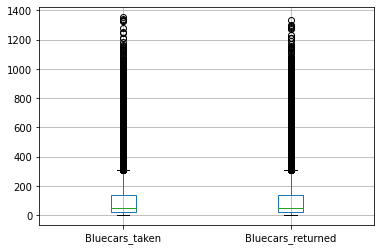

In [11]:
# Checking for Outliers
#Let's start with the Bluecars_taken 
boxplot = data1.boxplot(column=['Bluecars_taken', 'Bluecars_returned'])


In [12]:
#Removing the outliers/anomalies using percentile
#Starting with the Bluecars taken Column
max_threshold = data1['Bluecars_taken'].quantile(0.85)
print(max_threshold)
min_threshold = data1['Bluecars_taken'].quantile(0.15)
print(min_threshold)
data2 = data1[data1['Bluecars_taken']<= max_threshold]
data2 = data1[data1['Bluecars_taken']> min_threshold]
print(data2.shape)


284.0
12.0
(13621, 6)


In [13]:
#Removing the outliers/anomalies in the Bluecars returned Column
max_threshold1 = data2['Bluecars_returned'].quantile(0.85)
print(max_threshold)
min_threshold = data2['Bluecars_taken'].quantile(0.15)
print(min_threshold)
data3 = data2[data2['Bluecars_returned']<= max_threshold1]
data3 = data2[data2['Bluecars_taken']> min_threshold]
print(data3.shape)


284.0
22.0
(11569, 6)


In [14]:
#Converting datatypes
data3['date']= pd.to_datetime(data3['date']) 
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11569 entries, 0 to 16082
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Postal code        11569 non-null  int64         
 1   date               11569 non-null  datetime64[ns]
 2   dayOfWeek          11569 non-null  int64         
 3   day_type           11569 non-null  object        
 4   Bluecars_taken     11569 non-null  int64         
 5   Bluecars_returned  11569 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 632.7+ KB


## 5. Data Sampling

First we will use stratified sampling to create two datasets, one for weekends and another for weekdays. After which we will use simple random sampling with a sample size of 350 and 371 for weekends dataset and weekdays dataset respectively.

The sample sizes were calculated using an online sample calculator.

In [15]:
#We will take two samples one from weekdays and another from weekends
weekdays_df = data3[data3['day_type'] == 'weekday']
weekdays_df.reset_index(drop=True, inplace=True)
weekdays_df.tail()

,Postal code,date,dayOfWeek,day_type,Bluecars_taken,Bluecars_returned
8031,95880,2018-04-02,0,weekday,36,31
8032,95880,2018-05-01,1,weekday,24,25
8033,95880,2018-05-08,1,weekday,31,32
8034,95880,2018-05-21,0,weekday,26,27
8035,95880,2018-06-12,1,weekday,25,25


In [16]:
weekends_df = data3[data3['day_type'] == 'weekend']
weekends_df.reset_index(drop=True, inplace= True)
weekends_df.tail(3)

,Postal code,date,dayOfWeek,day_type,Bluecars_taken,Bluecars_returned
3530,95880,2018-06-03,6,weekend,36,33
3531,95880,2018-06-10,6,weekend,34,32
3532,95880,2018-06-17,6,weekend,33,35


In [17]:
import random  
from random import sample

In [18]:
#Random sampling for weekdays_df
sample_weekday_df =weekdays_df.sample(n=371,replace="False")
sample_weekday_df.shape

(371, 6)

In [19]:
#Random sampling for weekends_df
sample_weekend_df =weekends_df.sample(n=350,replace="False")
sample_weekend_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 1430 to 3059
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Postal code        350 non-null    int64         
 1   date               350 non-null    datetime64[ns]
 2   dayOfWeek          350 non-null    int64         
 3   day_type           350 non-null    object        
 4   Bluecars_taken     350 non-null    int64         
 5   Bluecars_returned  350 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 19.1+ KB


## 6. Exploratory Analysis

**Univariate Analysis**:
We will be dealing with numerical variables and we will be checking the following properties:

Mean
Median
Standard Deviation
Kurtosis/skewness
distribution/range
We will also plot to visualize our data each at a time



In [20]:
#Calculate measures of central tendency for weekday sample dataset
print('Measures of central tendency for sample weekday dataset: ')
df= sample_weekday_df[['Bluecars_returned', 'Bluecars_taken']]
print('Mean is: ')
print(df.mean())
print('Mode is: ')
print(df.mode())
print('Median is: ')
print(df.median())


Measures of central tendency for sample weekday dataset: 
Mean is: 
Bluecars_returned    164.87062
Bluecars_taken       165.97035
dtype: float64
Mode is: 
   Bluecars_returned  Bluecars_taken
0                 26              23
1                 30              35
2                 47              53
Median is: 
Bluecars_returned    78.0
Bluecars_taken       81.0
dtype: float64


In [21]:
#Get min, max and range
print('Minimum usage is: ')
print(df.min())
print('Maximum usage was is: ')
print(df.max())


Minimum usage is: 
Bluecars_returned    18
Bluecars_taken       23
dtype: int64
Maximum usage was is: 
Bluecars_returned    1039
Bluecars_taken       1089
dtype: int64


In [22]:
#Calculate quantiles
quantiles = df.quantile([0.25,0.5,0.75])
print(quantiles)


      Bluecars_returned  Bluecars_taken
0.25               40.0            39.0
0.50               78.0            81.0
0.75              262.5           268.5


In [23]:
#Calculating measures of dispersion
print('Skew is: ')
print(df.skew())
print('Kurtosis is: ')
print(df.kurtosis())


Skew is: 
Bluecars_returned    1.740726
Bluecars_taken       1.773511
dtype: float64
Kurtosis is: 
Bluecars_returned    2.940894
Bluecars_taken       3.221362
dtype: float64


**Sample weekday observation**:

1.  The number of Bluecars taken and that returned seems to have a relationship. The mean, mode and Median numbers of cars taken and those returned is practically the same.

2.   Both distributions (Bluecars taken and Bluecars returned) are highly skewed to the right.





In [24]:
#Calculate measures of central tendency for weekend sample dataset
print('Measures of central tendency for sample weekend dataset: ')

df= sample_weekend_df[['Bluecars_returned', 'Bluecars_taken']]
df.describe()

Measures of central tendency for sample weekend dataset: 


,Bluecars_returned,Bluecars_taken
count,350.000000,350.000000
mean,184.985714,183.268571
std,223.522637,219.362797
min,18.000000,23.000000
25%,44.000000,47.000000
50%,86.000000,86.500000
75%,245.500000,239.750000
max,1214.000000,1248.000000


In [25]:
#Calculating measures of dispersion
print('Skew is: ')
print(df.skew())
print('Kurtosis is: ')
print(df.kurtosis())

Skew is: 
Bluecars_returned    1.984333
Bluecars_taken       2.013807
dtype: float64
Kurtosis is: 
Bluecars_returned    3.750022
Bluecars_taken       3.964647
dtype: float64


**Sample weekend observation**:

1.  The number of Bluecars taken and that returned seems to have a relationship. The mean, mode and Median numbers of cars taken and those returned is practically the same.

2.   Both distributions (Bluecars taken and Bluecars returned) are highly skewed to the right.

A similar observation can be noted for observations taken during the normal weekdays.


However the mean of Blue car usage is relatively higher during the weekend compared to the weekdays


In [26]:
# Univariate Analysis
#Frequency tables
df_swd= sample_weekday_df[['date', 'dayOfWeek','Bluecars_returned', 'Bluecars_taken']]
days = df_swd.groupby('dayOfWeek')
days.Bluecars_taken.value_counts()

dayOfWeek  Bluecars_taken
0          32                3
           141               3
           23                2
           27                2
           28                2
                            ..
4          487               1
           546               1
           724               1
           746               1
           1089              1
Name: Bluecars_taken, Length: 297, dtype: int64

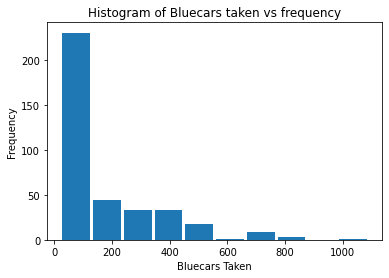

In [27]:
#Plotting a Bluecars taken histogram for weekdays dataset
Bluecars_taken = df_swd['Bluecars_taken']

plt.hist(Bluecars_taken, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Bluecars Taken')
plt.ylabel('Frequency')
plt.title('Histogram of Bluecars taken vs frequency')
plt.show()
#From the histogram we can see that our data is not normally distributed
#And that most observations are between 0 and 50

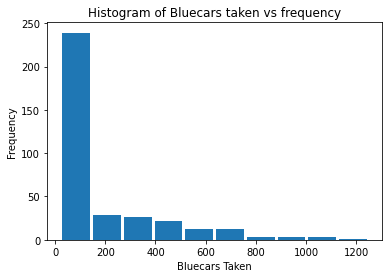

In [28]:
#Plotting a Bluecars taken histogram for weekends dataset
df_sample_weekend= sample_weekend_df[['date', 'dayOfWeek','Bluecars_returned', 'Bluecars_taken']]
Bluecars_taken = df_sample_weekend['Bluecars_taken']

plt.hist(Bluecars_taken, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Bluecars Taken')
plt.ylabel('Frequency')
plt.title('Histogram of Bluecars taken vs frequency')
plt.show()
#From the histogram we can see that data from the weekends is not normally distributed
#And that most observations of bluecars taken are between 0 and 50

**Summary**
1.  Observations from both weekdays and weekends are not normally distributed
2.  Most stations rent out cars between 0 and 100 in both occasions



**Bivariate Analysis**: At this point we will check relationships and differences between Bluecars returned and Bluecars taken from both weekends and weekdays. 

In [29]:
#Numeric-Numeric Variables
#We will be checking the relationship between bluecars returned and bluecars
# taken for weekends
df= sample_weekend_df[['Bluecars_returned', 'Bluecars_taken']]
df.reset_index(drop=True, inplace= True)
df.head()

,Bluecars_returned,Bluecars_taken
0,88,92
1,204,221
2,153,155
3,44,50
4,29,28


In [30]:
#Calculating correlation
correlation = df.dropna().corr()
correlation

,Bluecars_returned,Bluecars_taken
Bluecars_returned,1.000000,0.998344
Bluecars_taken,0.998344,1.000000


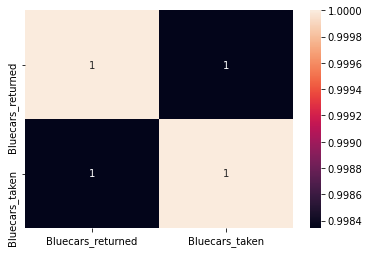

In [31]:
#plotting a correlation heatmap
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
#There is a perfect correlation between bluecars taken and bluecars returned

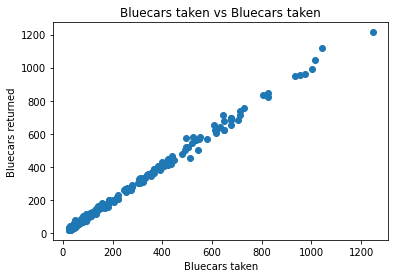

In [32]:
#Plotting scatter plots
plt.scatter(df["Bluecars_taken"] , df["Bluecars_returned"])

# Giving our scatterplot a title
plt.title('Bluecars taken vs Bluecars taken')

# Labelling our x axis
plt.xlabel('Bluecars taken')

# Labelling our y axis
plt.ylabel('Bluecars returned')

# We then display our scatterplot as shown below
plt.show()

**Summary**

1.   There is a perfeect correlation between number of bluecars taken and number of bluecars returned during the week and on weekends


## 7. Hypothesis Testing

**Checking for assumptions between the number of Bluecars taken from  sample_weekday_df and sample_weekend_df**

In [36]:
#First lets create a new dataframe frame containing sample records of bluecars taken 
data_weekday = sample_weekday_df['Bluecars_taken']
data_weekday.head()

3391     44
7933     71
4566     57
4104    101
168     171
Name: Bluecars_taken, dtype: int64

In [38]:
#Normality test
#We will use shapiro wilk test to test if numbers of Bluecars taken during the
# week and on weekends are normally distributed
from scipy.stats import shapiro
stat, p = shapiro(data_weekday)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.759, p=0.000
Sample does not look Gaussian


In [39]:
#We then create a new dataframe frame containing sample records of bluecars taken 
#from sample_weekend_df
data_weekend = sample_weekend_df['Bluecars_taken']
data_weekend.head()

1430     92
2233    221
2248    155
2985     50
3321     28
Name: Bluecars_taken, dtype: int64

In [40]:
#Test for normality for bluecars taken during the weekend
from scipy.stats import shapiro
stat, p = shapiro(data_weekend)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.712, p=0.000
Sample does not look Gaussian


Since both of our datasets do not follow a normal distribution, we reject the use of all parametric tests and consider using non parametric test.

In our case we will use Wilcoxon Signed-Rank Test for two paired samples since our samples are drawn from the same population.

Our hypothesis as defined earlier:

**Null and Alternative hypothesis**

Ho: mu₁ = mu₂

H1: mu₁ != mu₂

We will define our alpha = 0.05

**Asumptions**

To use Wilcoxon Signed-Rank test both dataset x and y need to have the **same** **length** and their should be atleast **20 records**

In [42]:
#To satisfy the assumptions we will choose another random sample of 50 records from both our datasets
df1 =data_weekday.sample(n=50,replace="False")
df1.shape

(50,)

In [43]:
df2 =data_weekend.sample(n=50,replace="False")
df2.shape

(50,)

In [45]:
from scipy.stats import wilcoxon
# compare samples
stat, p = wilcoxon(df1, df2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Mean of bluecars taken during weekdays is similar to mean of bluecars taken during the weekend (fail to reject H0)')
else:
    print('Mean of bluecars taken during weekdays is different to mean of bluecars taken during the weekend (reject H0)')

Statistics=528.000, p=0.290
Mean of bluecars taken during weekdays is similar to mean of bluecars taken during the weekend (fail to reject H0)


**Interpretation of results**

A Wilcoxon T test was used to analyze the number of blue cars taken during normal weekdays and on weekends to test if there is a significant difference between usage of bluecars on weekdays as compared to weekends. 
From our results, we can conclude that usage of blue cars is similar on weekends and weekdays. People don’t seem to rent out more bluecars on weekends as claimed by the management of Autolib Carsharing Company.


## 8. Conclusion